In [51]:
import os
import pandas as pd
from matplotlib.font_manager import fontManager
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.set(font='Malgun Gothic',
       rc ={'axes.unicode_minus':False},
       style='whitegrid')

In [4]:
os.chdir("C:\\Users\\cktna\\Downloads\\bigcon-2020-master\\bigcon-2020-master")

In [80]:
schedule = pd.read_csv("schedule.csv")
data = pd.read_csv("data/data.csv")
test = data.loc[data.취급액.isna()]

In [81]:
schedule.shape, test.shape

((607, 4), (2716, 88))

In [83]:
schedule.rename(columns ={"상품":"상품명"}, inplace=True)

In [84]:
data = pd.merge(schedule, test, on="상품명", how="left")

In [86]:
data = data.drop_duplicates(subset = ["time","상품명"])

In [87]:
data = data.assign(hour = data['time'].apply(lambda x:int(x.split()[1])))

In [91]:
data.dropna(subset=["방송일시"], inplace=True)

In [93]:
data.head(10)

,time,prod_group,예상취급액,상품명,방송일시,노출(분),마더코드,상품코드,상품군,판매단가,...,TV_요일시_총합,TV_만원대_분,TV_만원대_평균,TV_만원대_최고,TV_만원대_총합,TV_월_분,TV_월_평균,TV_월_최고,TV_월_총합,hour
0,2020-06-01 06,1609,2.449048e+07,제니하우스 살롱코드 염색제(멀티포트),2020-06-23 06:20:00,20.0,100059.0,200146.0,이미용,79900.0,...,0.033938,20.521192,0.003868,0.015459,0.078404,20.45803,0.003233,0.015686,0.067733,6
3,2020-06-01 07,1567,6.005506e+07,래쉬톡 원터치 속눈썹,2020-06-14 01:20:00,20.0,100799.0,202363.0,이미용,59900.0,...,0.044553,20.189322,0.004460,0.017196,0.089976,20.45803,0.003233,0.015686,0.067733,7
8,2020-06-01 08,1504,6.764663e+07,발레리 라이크라 쉐이핑 팬티 10+2종 패키지(19차),2020-06-05 07:20:00,15.0,100077.0,200212.0,속옷,49900.0,...,0.049318,19.742780,0.005124,0.019631,0.101082,20.45803,0.003233,0.015686,0.067733,8
12,2020-06-01 09,1503,7.603722e+07,블링썸 듀얼 포시즌 틴트브로우,2020-06-05 01:20:00,20.0,100259.0,200873.0,이미용,49900.0,...,0.100850,19.742780,0.005124,0.019631,0.101082,20.45803,0.003233,0.015686,0.067733,9
15,2020-06-01 10,1541,5.947027e+07,루시헨느 글리터 레이스 브라탑 4종,2020-06-10 09:20:00,20.0,100778.0,202275.0,속옷,79900.0,...,0.095075,20.521192,0.003868,0.015459,0.078404,20.45803,0.003233,0.015686,0.067733,10
30,2020-06-01 11,1616,7.245145e+07,에이유플러스 아이스크림 필링(최저가),2020-06-24 14:20:00,20.0,100363.0,201151.0,이미용,39900.0,...,0.103805,18.788212,0.005091,0.017073,0.095699,20.45803,0.003233,0.015686,0.067733,11
34,2020-06-01 13,1596,7.982602e+06,프로피쿡 올인원 블렌더,2020-06-19 10:20:00,20.0,100429.0,201342.0,주방,88000.0,...,0.105345,20.337046,0.004156,0.016068,0.081322,20.45803,0.003233,0.015686,0.067733,13
40,2020-06-01 15,1497,3.382076e+07,비비고 만두,2020-06-04 16:20:00,20.0,100621.0,201923.0,농수축,30900.0,...,0.114187,18.788212,0.005091,0.017073,0.095699,20.45803,0.003233,0.015686,0.067733,15
49,2020-06-01 16,1493,7.491439e+07,국내산 반건조우럭 8팩,2020-06-04 11:20:00,20.0,100546.0,201632.0,농수축,39900.0,...,0.141701,18.788212,0.005091,0.017073,0.095699,20.45803,0.003233,0.015686,0.067733,16
60,2020-06-01 17,1500,7.491439e+07,[바다먹자] 국내산 반건조 오징어 7팩 (14미),2020-06-04 21:20:00,20.0,100800.0,202364.0,농수축,39900.0,...,0.085979,18.788212,0.005091,0.017073,0.095699,20.45803,0.003233,0.015686,0.067733,17


In [64]:
cat_vars = ["성별","결제방법","세트여부","일","시간","요일","일별방송순서","월별방송순서","hour_rank","공휴일여부","연휴",
           "브랜드","NS상품군_대","NS상품군_중","NS상품군_소"]

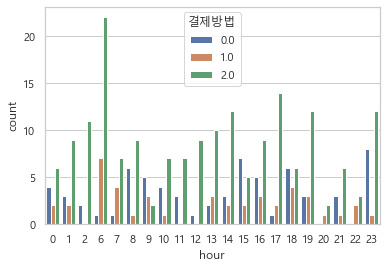

In [75]:
sns.countplot(x="hour",hue="결제방법",data=data)

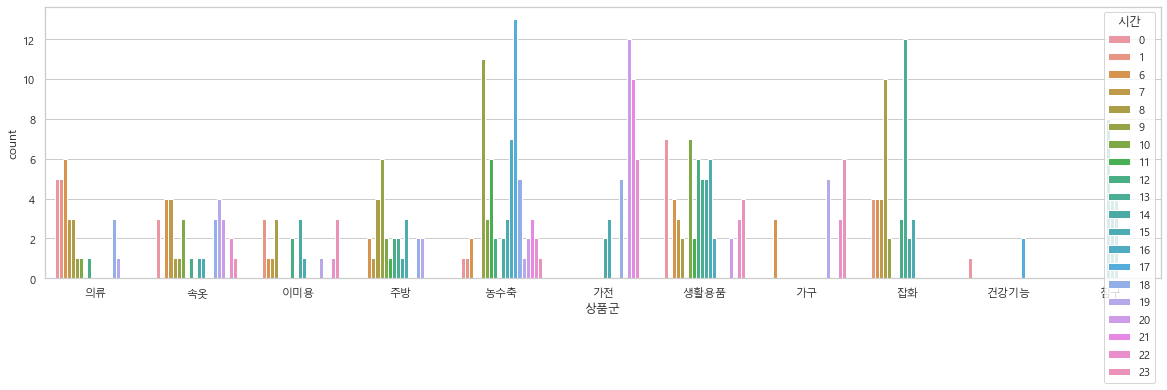

In [95]:
plt.figure(figsize=(20,5))
sns.countplot(x="상품군", hue="시간", data=test.drop_duplicates(subset=["상품명"]))

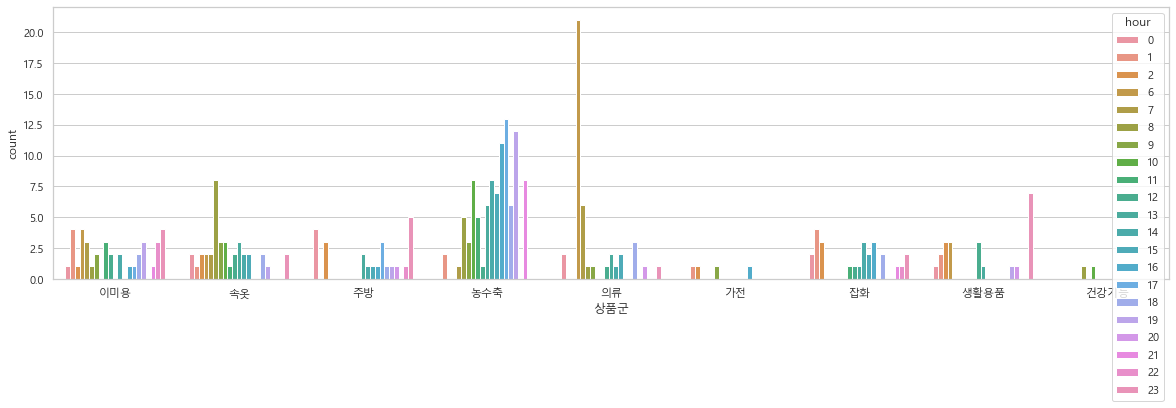

In [77]:
plt.figure(figsize=(20,5))
sns.countplot(x="상품군", hue="hour", data=data)

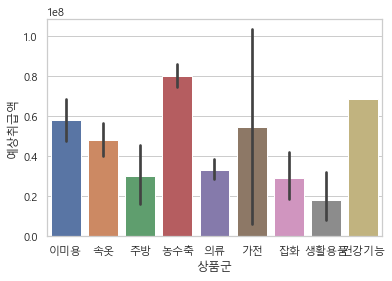

In [79]:
sns.barplot(x='상품군', y="예상취급액", data=data)

In [76]:
data.hour.value_counts().sort_index()

0     23
1     29
2     18
6     30
7     30
8     30
9     30
10    30
11    30
12    30
13    30
14    28
15    30
16    30
17    30
18    29
19    30
20    30
21    30
22    30
23    30
Name: hour, dtype: int64